# Mnist 数据集
- 训练集：60000
- 测试集：10000
- 图片：28x28x1 $\rightarrow$ 784

In [2]:
import numpy as np
from tqdm import tqdm

In [20]:
# load data
def load_data(fileName):
    dataArr = []
    labelArr = []
    
    fr = open(fileName, 'r')
    
    for line in tqdm(fr.readlines()):
        currentLine = line.strip().split(',')
        
        # preprocess > 128 -> 1  <128 ->0 二值化处理方便后面计算
        dataArr.append([int(int(num) > 128) for num in currentLine[1: ]])
        labelArr.append(int(currentLine[0]))
    
    return dataArr, labelArr

In [8]:
def NaiveBayes(Py, Px_y, x):
    
    # feature 维度
    featureDim = 784
    
    # label 类别数目
    labelNum = 10
    
    # 存放所有标记的估计概率数组
    P = [0] * labelNum
    
    # 对于每一个类别，单独估计其概率
    for i in range(labelNum):
        # 对概率log处理 连乘变成了连加
        sum_ = 0
        
        for j in range(featureDim):
            sum_ += Px_y[i][j][x[j]]
        #
        P[i] = sum_ + Py[i]
        
    # maxP 找到概率最大值 P.index(max(P)) 找索引
    return P.index(max(P))

def getAIIProbability(trainDataArr, trainLabelArr):
    """
    训练集 先验概率分布和条件概率分布
    """
    
    # feature 维度
    featureDim = 784
    
    # label 类别数目
    labelNum = 10
    
    # 存放先验概率
    Py = np.zeros((labelNum, 1))
    
    # 对每个类别遍历循环
    for i in range(labelNum):
        # 贝叶斯估计 lambda = 1
        Py[i] = ((np.sum(np.mat(trainLabelArr) == i)) + 1) / (len(trainLabelArr) + 10)
    
    Py = np.log(Py)
    
    # 计算条件概率 Px_y = P(X=x|Y=y)
    Px_y = np.zeros((labelNum, featureDim, 2))
    
    # 对标记进行遍历
    for i in range(len(trainLabelArr)):
        # 获取当前循环使用标记label 和 样本x
        label = trainLabelArr[i]
        x = trainDataArr[i]
        for j in range(featureDim):
            Px_y[label][j][x[j]] += 1
            
    for label in range(labelNum):
        for j in range(featureDim):
            Px_y0 = Px_y[label][j][0]
            Px_y1 = Px_y[label][j][1]
            
            # 
            Px_y[label][j][0] = np.log((Px_y0 + 1) / (Px_y0 + Px_y1 + 2 * 1))
            Px_y[label][j][1] = np.log((Px_y1 + 1) / (Px_y0 + Px_y1 + 2 * 1))
            
    # 先验概率和条件概率
    return Py, Px_y

In [6]:
trainDataArr, trainLabelArr = load_data("./mnist/mnist_train.csv")
testDataArr, testLabelArr = load_data("./mnist/mnist_test.csv")

# 取1000个样本
trainDataArr = trainDataArr[: 1000]
trainLabelArr = trainLabelArr[: 1000]
testDataArr = testDataArr[:1000]
testLabelArr = testLabelArr[: 1000]


100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 5021.55it/s]


In [9]:
# train
Py, Px_y = getAIIProbability(trainDataArr, trainLabelArr)

In [11]:
# test

# 错误统计
error_count = 0

# prediction list
y_pre = []

for i in range(len(testDataArr)):
    y_predict = NaiveBayes(Py, Px_y, testDataArr[i])
    y_pre.append(y_predict)
    
    # 与label比较
    if y_predict != testLabelArr[i]:
        error_count += 1
    
acc = 1 - (error_count / len(testDataArr))
print(acc)

0.756


# confusion matrix


In [12]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
# import numpy as np
%matplotlib inline

In [13]:
def plot_confusion_matrix(true_label, pred_label, class_name):
    y_true = true_label
    y_pred = pred_label
    confusion_mat = confusion_matrix(y_true, y_pred)
    print(confusion_mat)
    
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    
    plt.figure(figsize=(4, 3), dpi = 300)
    plt.imshow(confusion_mat, cmap = plt.cm.get_cmap("Blues"))
    plt.colorbar()
    
    indices = range(len(confusion_mat))
    
    plt.xticks(indices, class_name, rotation = 0)
    plt.yticks(indices, class_name)
    
    plt.title("confusion matrix", fontdict={'fontsize': 12})
    plt.xlabel("Predcited label", fontdict={'fontsize': 12})
    plt.ylabel("True label", fontdict= {'fontsize': 12})
    
    for first_index in range(len(confusion_mat)):
        for second_index in range(len(confusion_mat[first_index])):
            if first_index == second_index:
                plt.text(first_index, second_index, confusion_mat[first_index][second_index],
                        color = 'white', fontsize = 12, va = 'center', ha = 'center')
            else:
                plt.text(first_index, second_index, confusion_mat[first_index][second_index],
                        color = 'black', fontsize = 12, va = 'center', ha = 'center')
                
    plt.show()

[[ 76   0   0   0   0   5   3   0   1   0]
 [  0 120   0   0   0   5   1   0   0   0]
 [  1  17  82   3   0   1   2   6   3   1]
 [  0   2   0  69   1  27   0   2   2   4]
 [  0   2   0   0  73   0   2   0   1  32]
 [  3   1   0   6   4  62   0   4   4   3]
 [  5   0   6   0   7   5  64   0   0   0]
 [  0   5   3   0   3   1   0  76   1  10]
 [  1   3   2   5   6   9   2   2  51   8]
 [  0   1   1   0   6   1   0   0   2  83]]


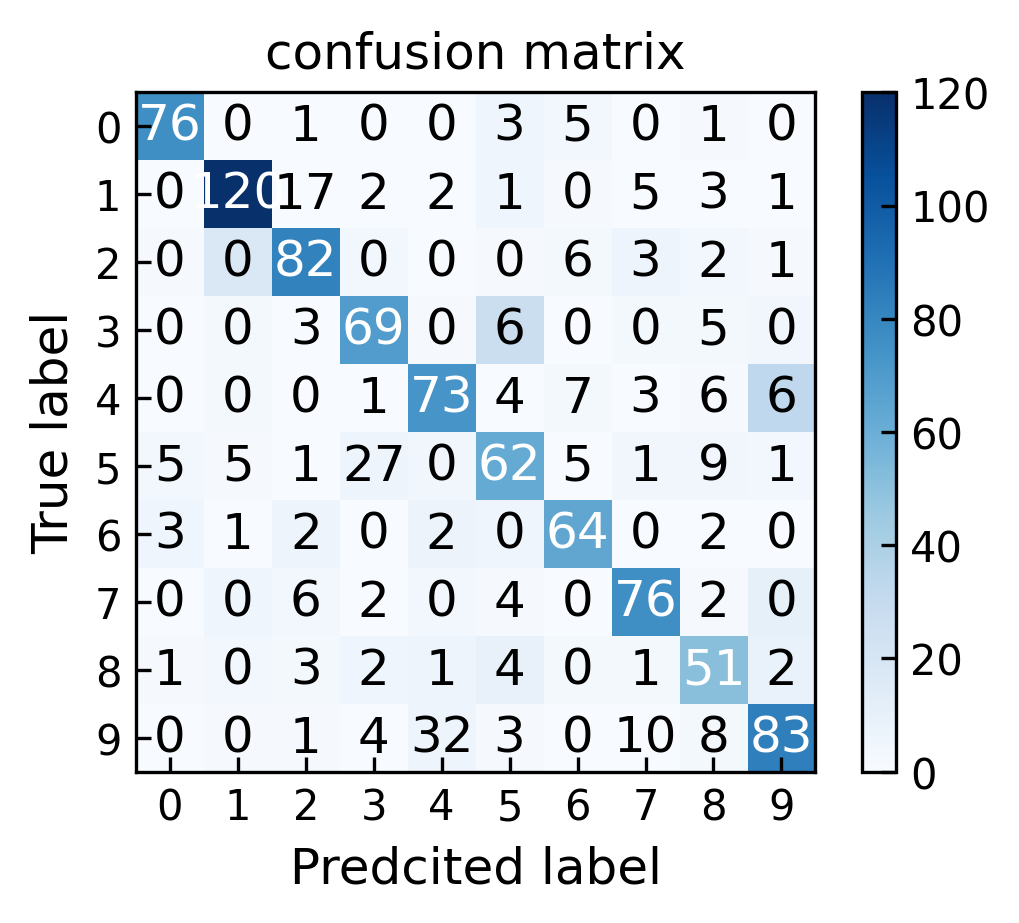

In [14]:
y_true = testLabelArr

class_name = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
plot_confusion_matrix(y_true, y_pre, class_name)

In [19]:
type(trainLabelArr[0])

int